## Espectros estelares

Los cuepros que emiten luz en el universo pueden ser caracterizados a partir de su espectro. El cual corresponde a la descomposición de su luz en sus diferentes longitudes de onda. Para el caso de las estrellas, éstas describen una curva característica definida por el modelo de Planck (en donde se presenta un punto de mayor emisión de energía que va relacionado con su temperatura).

Abajo tenemos 3 ejemplos del espectro contínuo para estrellas de diferentes temperaturas la roja es la más fría y la azul la más caliente. ¿Notan en dónde se encuentra el pico de máxima emisión?

![spectra](https://i0.wp.com/www.fqsaja.com/wp-content/uploads/2014/12/star_colors.png)

Sin embargo, además de la parte contínua del espectro, tambíen encontramos rasgos particulares como son las líneas de emisión y absorción, las cuales son producidas por elementos químicos contenidos en la atmósfera estelar. Abajo les muestro unos para 7 estrellas diferentes:

![lineas](https://www.astro4edu.org/media/diagrams/multimedia/spectra-lines_es.png)

En esta sesión vamos a explorar cómo acceder y descargar datos espectrales de alta resolución para luego graficarlos. Los archivos que vamos a explorar provienen de los archivos públicos: CARMENES, HARPS, HIRES.


In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy import units as u, constants
import numpy as np

plt.rcParams.update({'font.size':12})

Por ahora, vamos a descargar un par de espectros en el repositorio del espectrógrafo CARMENES. Para ello, ingresamos a la página https://koa.ipac.caltech.edu/cgi-bin/KOA/nph-KOAlogin

Vamos a buscar la estrella WASP-76, la cual contiene un exoplaneta confirmado orbitando alrededor de ésta. Vamos a descargar un espectro en el visible y uno en el infrarrojo cercano.

Aplicando lo aprendido en la sesión de imágenes FITS. Vamos a cargar el archivo con datos y visualizar su medatada.

In [2]:
spectrum= fits.open('/content/car-20181003T22h44m58s-sci-czes-vis_A.fits')


In [3]:
spectrum.info()

Filename: /content/car-20181003T22h44m58s-sci-czes-vis_A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     342   ()      
  1  SPEC          1 ImageHDU         8   (4096, 61)   float32   
  2  CONT          1 ImageHDU         8   (4096, 61)   float32   
  3  SIG           1 ImageHDU         8   (4096, 61)   float32   
  4  WAVE          1 ImageHDU         8   (4096, 61)   float64   


Es importante notar que se presentan 5 secciones almacenadas. La priemera (PRIMARY) presenta sólo la información de metadata general del archivo. Los demás corresponden a información específica de las variables medidas del espectro.

Para este caso, vamos a usar únicamente la parte del flujo espectral (SPEC) y la sección de la longitud de onda (WAVE). Los restantes (CONT y SIG) corresponden a la substracción del cielo y error del flujo, respectivamente.

Finalmente, las dimensiones nos muestra que se tiene una matriz de 2 dimensiones con 61 filas (órdenes) del espectro con 4096 valores cada uno.

In [8]:
spectrum['PRIMARY'].header[0:30]

SIMPLE  =                    T /Primary Header created by MWRFITS v1.12         
BITPIX  =                    8 /                                                
NAXIS   =                    0 /                                                
EXTEND  =                    T / FITS dataset may contain extensions            
ECHVERS =              1.00000 / version number of echelle data format          
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT   FITS (Flexible Image Transport System) 2010A&A...524..A42P            
DATAMAX =                 2809 / [adu] Maximum data value in array              
DATAMIN =                 1612 / [adu] Minimum data value in array              
FILENAME= 'car-20181003T22h44m58s-sci-czes-vis.fits' / This file name           
OBJECT  = 'WASP-76 '           / Observed object                                
DATE-OBS= '2018-10-03T22:44:

In [10]:
spectrum['SPEC'].header


XTENSION= 'IMAGE   '           /Image Extension created by MWRFITS v1.12        
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                 4096 /                                                
NAXIS2  =                   61 /                                                
EXTNAME = 'SPEC    '           /                                                
PCOUNT  =                    0 /                                                
GCOUNT  =                    1 /                                                

Para extraer los datos correspondientes accedemos de la siguiente manera.

In [13]:
print(spectrum['SPEC'].data[10])
spectrum['WAVE'].data[10]

[0.48919526 0.48604846 0.44314748 ... 0.4097267  0.4101972  0.43059376]


array([5612.20461384, 5612.23470293, 5612.2647891 , ..., 5710.09885402,
       5710.11643299, 5710.13400882], dtype='>f8')

¿Qué pasa si graficamos únicamente el primer órden? Esto significa que porsiones pequeñas del espectro están guardadas en arreglos independientes.

Dado que no es posible guardar todo el espectro visible ante las limitaciones físicas del instrumento, nos valemos del fenómeno de la refracción de la luz.

![difraction](https://s3-us-west-2.amazonaws.com/courses-images-archive-read-only/wp-content/uploads/sites/222/2016/02/20113156/Figure_28_03_03a.jpg)

(0.07, 0.22)

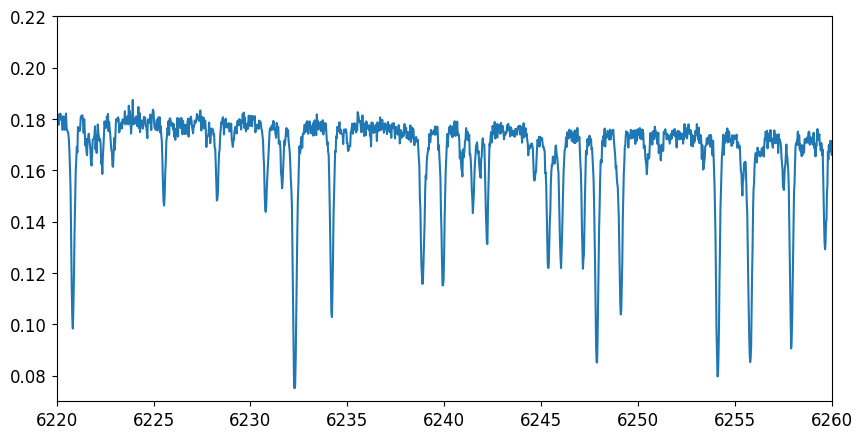

In [16]:
plt.figure(figsize=(10,5))
plt.plot(spectrum['WAVE'].data[20], spectrum['SPEC'].data[20])

plt.xlim(6220, 6260)
plt.ylim(0.07, 0.22)

## Extraer todos los órdenes

Podemos visualizar todo el rango espectral medido al graficar los 61 órdenes al tiempo. Para ello, usamos una función 'for':

(-0.001, 1.1)

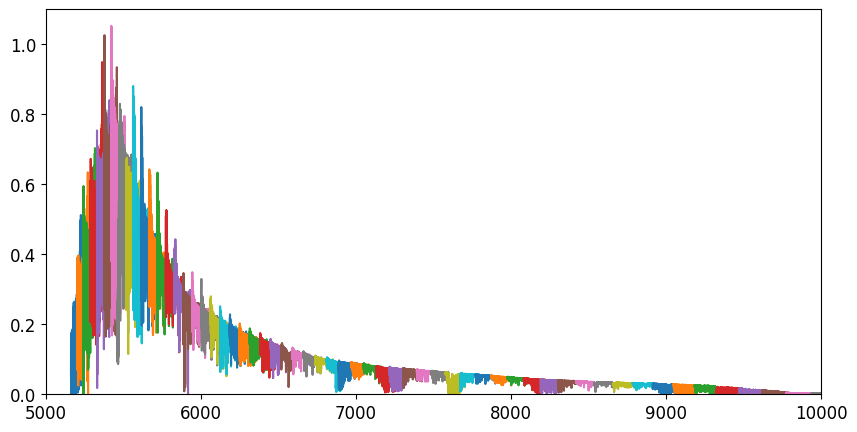

In [19]:
plt.figure(figsize=(10,5))

for i in range(len(spectrum['WAVE'].data)):
  plt.plot(spectrum['WAVE'].data[i], spectrum['SPEC'].data[i])

plt.xlim(5000, 10000)
plt.ylim(-0.001, 1.1)

## Para el infrarrojo

In [21]:
spectrum_nir=fits.open('/content/car-20181004T01h30m21s-sci-czes-nir_A.fits')
spectrum_nir.info()

Filename: /content/car-20181004T01h30m21s-sci-czes-nir_A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     470   ()      
  1  SPEC          1 ImageHDU         8   (4080, 28)   float32   
  2  CONT          1 ImageHDU         8   (4080, 28)   float32   
  3  SIG           1 ImageHDU         8   (4080, 28)   float32   
  4  WAVE          1 ImageHDU         8   (4080, 28)   float64   


(15100.0, 15500.0)

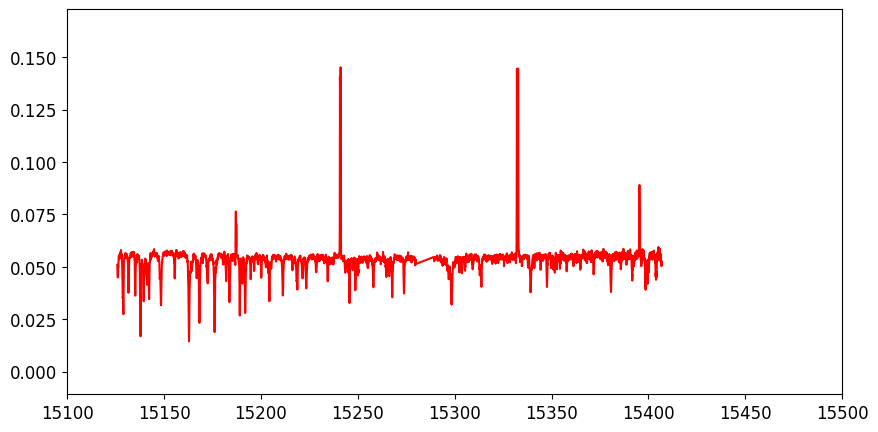

In [23]:
plt.figure(figsize=(10,5))

for i in range(len(spectrum_nir['WAVE'].data)):
  plt.plot(spectrum_nir['WAVE'].data[i], spectrum_nir['SPEC'].data[i],c='r')

plt.xlim(15100,15500)

## Tipos espectrales y ensanchamiento de líneas

Vamos ahora a analizar el espectro de dos estrellas diferentes. En este caso, se trata de datos tomados por el espectrógrafo HARPS. Ambas estrellas presentan clasificación espectrla difernete. ¿Es posible identificar sus características?

In [24]:
harps_1 = fits.open('/content/ADP.2014-10-06T10_06_37.517.fits')
harps_2 = fits.open('/content/ADP.2017-11-24T01_04_44.433.fits')

In [25]:
harps_1.info()

Filename: /content/ADP.2014-10-06T10_06_37.517.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    3075   ()      
  1  SPECTRUM      1 BinTableHDU     45   1R x 3C   [313156D, 313156E, 313156E]   


In [26]:
harps_1[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =              5010496 / length of dimension 1                          
NAXIS2  =                    1 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    3 / number of table fields                         
TTYPE1  = 'WAVE    '                                                            
TFORM1  = '313156D '                                                            
EXTNAME = 'SPECTRUM'           / Extension Name                                 
DATASUM = '3002468238'         / data unit checksum updated 2014-09-18T12:44:13 
TTYPE2  = 'FLUX    '        

In [27]:
harps_1[1].data['FLUX']

array([[ 123.28319,   81.7451 ,   91.4292 , ..., 4302.205  , 4620.925  ,
        5008.115  ]], dtype='>f4')

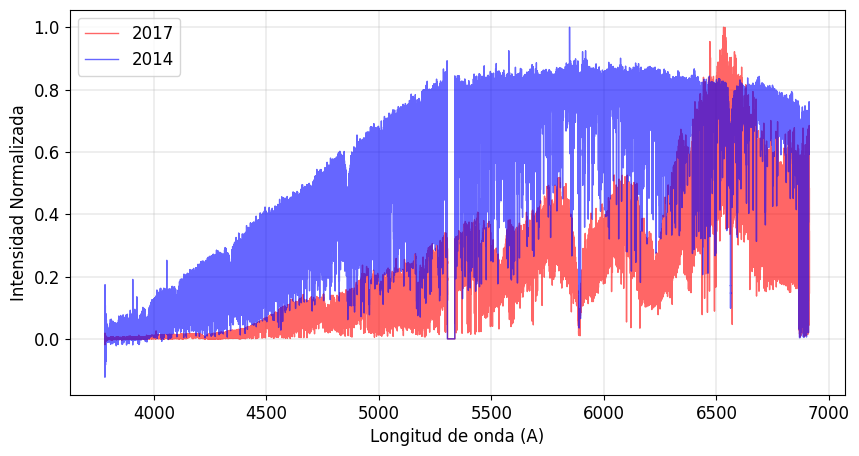

In [31]:
waves_1 = harps_1[1].data['WAVE'][0]
flux_1 = harps_1[1].data['FLUX'][0]/np.nanmax(harps_1[1].data['FLUX'][0])

waves_2 = harps_2[1].data['WAVE'][0]
flux_2 = harps_2[1].data['FLUX'][0]/np.nanmax(harps_2[1].data['FLUX'][0])

plt.figure(figsize=(10, 5))
plt.plot(waves_1, flux_1, lw=1, color='r', alpha=0.6, label='2017')
plt.plot(waves_2, flux_2, lw=1, color='b', alpha=0.6, label='2014')

#plt.xlim(5000, 10000)
#plt.ylim(-0.001, 1.1)
plt.grid(linewidth=0.3)
plt.xlabel('Longitud de onda (A)')
plt.ylabel('Intensidad Normalizada')
plt.grid(lw=0.3)
plt.legend()

¿En dónde estará el máximo de cada distribución espectral?

El máximo flujo ocurre en: 6531.87 Angstrom


### Con esta información anterior, podemos conocer tranquilamente la temperatura de la estrella usando la Ley de Wien:

$T = \frac{0.002898\ {\rm K\cdot m}}{\lambda_{max}}$

In [32]:
max_flux=np.nanmax(flux_1)
max_wave=np.where(flux_1==max_flux)[0][0]

print('La longitud de onda máxima está en:',waves_1[max_wave])

La longitud de onda máxima está en: 6531.870000000001


In [33]:
T=0.002898*(1/(waves_1[max_wave]*1e-10))
print('La temperatura de la estrella es:',T)

La temperatura de la estrella es: 4436.708017765203


##¿Será posible ajustar una función de Planck a nuestro espectro y comparar?

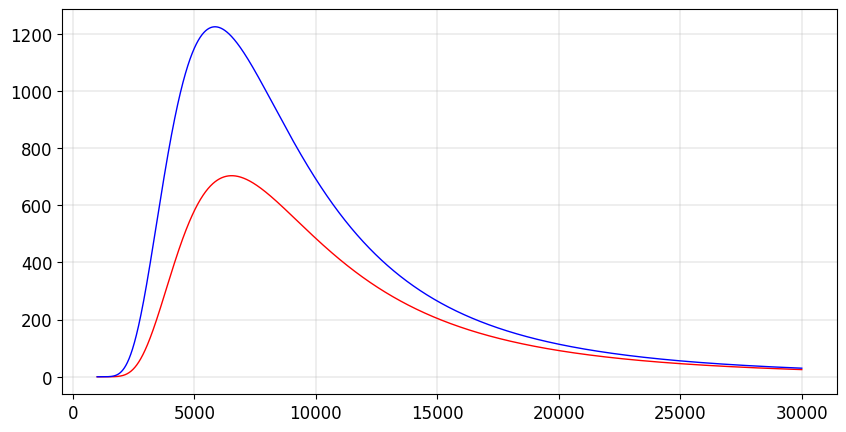

In [34]:
#Datos de entrada
T1 = 4436*u.K
T2 = 4956*u.K

kB = constants.k_B
c = constants.c
h = constants.h

#Arreglo de longitud de ondas en Angstrom
lo = np.arange(1000,30000,10)
lo_p = lo*10**(-10)*u.m

#La ecuación del modelo de Planck
B1 = (2*h*c**2/lo_p**5)*(1.0/(np.exp(h*c/(lo_p*kB*T1))-1))/1e10
B2 = (2*h*c**2/lo_p**5)*(1.0/(np.exp(h*c/(lo_p*kB*T2))-1))/1e10

plt.figure(figsize=(10, 5))
plt.plot(lo, B1, lw=1, color='red')
plt.plot(lo, B2, lw=1, color='blue')

#plt.xlim(-10, 10)
#plt.ylim(-0.001, 1.1)
plt.grid(linewidth=0.3)


Ahora, vamos a explorar algunas lineas espectrales:

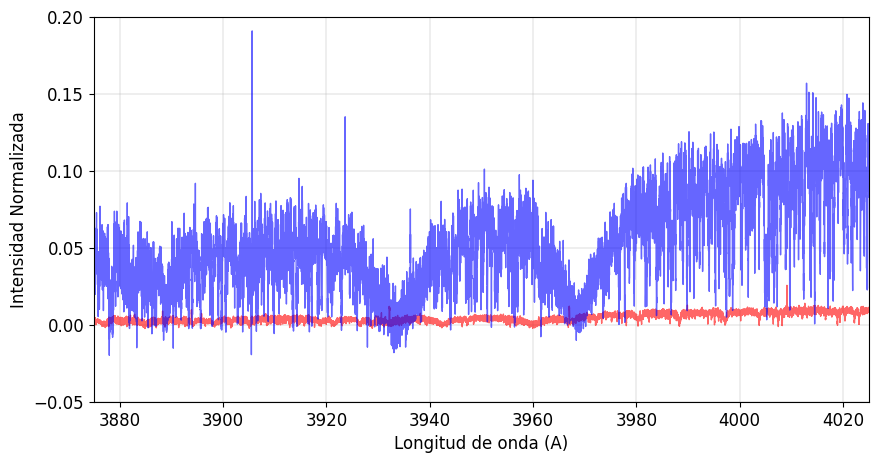

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(waves_1, flux_1, lw=1, color='r', alpha=0.6, label='2017')
plt.plot(waves_2, flux_2, lw=1, color='b', alpha=0.6, label='2014')

#plt.xlim(5000, 10000)
#plt.ylim(-0.001, 1.1)
plt.grid(linewidth=0.3)
plt.xlabel('Longitud de onda (A)')
plt.ylabel('Intensidad Normalizada')
#líneas H y K de Calcio
plt.xlim(3875, 4025)
plt.ylim(-0.05, 0.20)
plt.grid(lw=0.3)


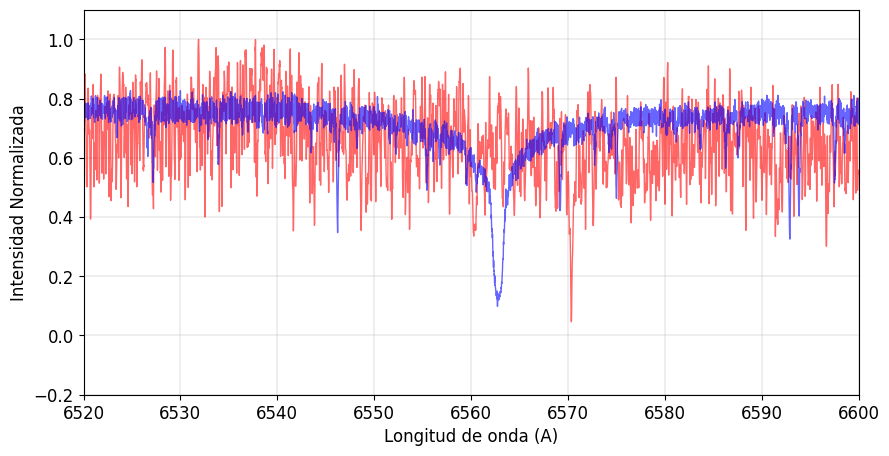

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(waves_1, flux_1, lw=1, color='r', alpha=0.6, label='2017')
plt.plot(waves_2, flux_2, lw=1, color='b', alpha=0.6, label='2014')

#plt.xlim(5000, 10000)
#plt.ylim(-0.001, 1.1)
plt.grid(linewidth=0.3)
plt.xlabel('Longitud de onda (A)')
plt.ylabel('Intensidad Normalizada')
#líneas H y K de Calcio
plt.xlim(6520, 6600)
plt.ylim(-0.2, 1.1)
plt.grid(lw=0.3)


## Mediciónd el ensanchamiento de líneas

Para esta parte, debemos instalar la paqutería de PyAstronomy, la cual permite estudiar algunos parámetros espectrales.

In [ ]:
!pip install PyAstronomy

Aquí vamos a analizar la velocidad de rotación de la estrella que ocasiona el ensanchamiento de línea.

Este ensanchamiento implica que a una velocidad dada de la estrella, junto al fenómeno del efecto Doppler, la línea presenta un incremento en su anchura, con esto podemos estimar la magnitud de dicha velocidad.

In [39]:
from PyAstronomy.pyasl import rotBroad
from astropy.io import ascii

wasp_model = ascii.read('/content/WASP33_Halpha_model.txt')
wasp_data = fits.open('/content/car-20170105T23h09m20s-sci-aloj-vis_A.fits')

ModuleNotFoundError: No module named 'PyAstronomy'

In [ ]:
plt.figure(1, figsize=(10, 5))
plt.plot(wasp_data[4].data[25], wasp_data[1].data[25], alpha=0.5, label='data')
plt.plot(wasp_model['wave'], wasp_model['flux'], alpha=0.5, label='model')
plt.legend(loc=0)

## Medición de Velocidad Radial

Utilizando el método de Correlación Cruzada vamos a estimar la velocidad radial (o de línea de vista) de la estrella de Barnard a partir de su comparación con un modelo teórico.

In [ ]:
from PyAstronomy.pyasl import crosscorrRV
from astropy.io import ascii, fits

In [ ]:
from PyAstronomy.pyasl import crosscorrRV



In [ ]:
plt.figure(1, figsize=(10, 5))
plt.plot(rv, cc)
plt.xlabel('Velocidad radial (km/s)', fontsize=14)
plt.ylabel('Correlación cruzada', fontsize=14)

En la gráfica anterior, estamos analizando para cada valor posible de velocidad radial, cuál es el acercamiento que tiene el modelo con la plantilla. El mayor valor indica que se presenta la mejor correlación.

¿A qué velocidad de acercamiento (o alejamiento) corresponde?

In [ ]:
corr_max = np.max(cc)
wave_max = np.where(cc == corr_max)[0][0]

print('La velocidad radial de la estrella es: {:} km/s'.format(rv[wave_max].round(2)))

## Analizando "Templates de Estrellas"

Si deseas analizar plantillas de espectros sintéticos para estrellas con diferentes temperaturas efectivas, puedes realizar una consulta a través del link: http://svo2.cab.inta-csic.es/theory/main/

In [ ]:
#Datos de entrada
T1 = 4200*u.K

kB = constants.k_B
c = constants.c
h = constants.h

#Arreglo de longitud de ondas en Angstrom
lo = np.arange(1000,40000,10)
lo_p = lo*10**(-10)*u.m

#La ecuación del modelo de Planck
B1 = (2*h*c**2/lo_p**5)*(1.0/(np.exp(h*c/(lo_p*kB*T1))-1))*3.1e-7


In [ ]:
plt.figure(1, figsize=(10, 5))
plt.plot(template_model['col1'], template_model['col2'], alpha=0.5, label='model')
plt.plot(lo, B1, lw=1, color='red')
plt.legend(loc=0)
plt.xlim(1000, 40000)
#plt.ylim(-300, 5000)
#plt.xscale('log')